In [1]:
import os
import pandas as pd
import nltk
import re
import stanza
import numpy as np
#stanza.download("cs")
nlp = stanza.Pipeline("cs")

/srv/venvs/default_venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-04-30 11:49:03 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2025-04-30 11:49:03 INFO: Downloaded file to /home/jupyter-vojta/stanza_resources/resources.json
2025-04-30 11:49:04 INFO: Loading these models for language: cs (Czech):
| Processor | Package      |
----------------------------
| tokenize  | pdt          |
| mwt       | pdt          |
| pos       | pdt_nocharlm |
| lemma     | pdt_nocharlm |
| depparse  | pdt_nocharlm |

2025-04-30 11:49:04 INFO: Using device: cuda
2025-04-30 11:49:04 INFO: Loading: tokenize
2025-04-30 11:49:05 INFO: Loading: mwt
2025-04-30 11:49:05 INFO: 

In [2]:
files_df = pd.read_json("../data/files_df.json")

In [3]:
files_df.shape

(11617, 5)

In [5]:
files_df["filename"] = files_df["file_url"].apply(lambda x: x.rpartition("/")[2].replace(".pdf", ".txt"))

In [6]:
files_df.drop_duplicates(subset="filename", keep="first", inplace=True)

In [8]:
x = "psi_1986_2_vina_ocr.txt"
re.search(r"19\d{2}", x).group()

'1986'

In [10]:
def year_from_filename(filename):
    try:
        return int(re.search(r"19\d{2}", filename).group())
    except:
        return None
files_df["year"] = files_df["filename"].apply(year_from_filename)

<Axes: >

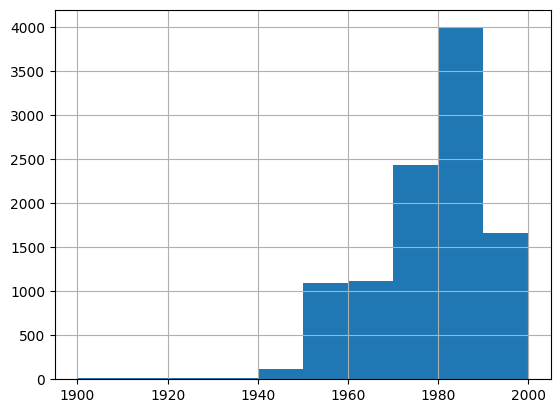

In [11]:
decade_bins = np.arange(files_df["year"].min(), files_df["year"].max() + 10, 10)
files_df["year"].hist(bins=decade_bins)

In [12]:
path = "../data/rawtexts/"
filenames = os.listdir(path)
len(filenames)

11615

In [13]:
files_df["filename"].apply(lambda x: x in filenames).sum()

np.int64(11614)

In [21]:
filename = filenames[16]
with open(path + filename) as f:
    text = f.read()

In [15]:
path = "../data/rawtexts/"

def get_numbers(filename):
    try:
        with open(path + filename) as f:
            text = f.read()
        pages_N = len(re.findall(r"\[pageend\d+\]", text))
        text = re.sub(r"\[pageend\d+\]", " ", text)
        text = re.sub(r'(\w+)- (\w+)', r'\1\2', text)
        tokens = nltk.word_tokenize(text)
        tokens_N = len(tokens)
        return pages_N, tokens_N 
    except:
        return 0, 0

In [16]:
files_df[['pages_N', 'tokens_N']] = files_df['filename'].apply(get_numbers).apply(pd.Series)

In [17]:
files_df.head(10)

,periodical_category,periodical_href,periodical_title,periodical_basic_info,file_url,filename,year,pages_N,tokens_N
0,samizdat,/cs/periodika/ps-psi,Ψ [Psí],"[, [Praha] , 1985 – 1989 , 1 × ročně , ]",https://files.scriptum.cz/scriptum/%5Bnode%5D/...,psi_1986_2_vina_ocr.txt,1986.0,36,24524
1,samizdat,/cs/periodika/ps-psi,Ψ [Psí],"[, [Praha] , 1985 – 1989 , 1 × ročně , ]",https://files.scriptum.cz/scriptum/%5Bnode%5D/...,psi_1987_3_freud-a-psychoanalyza_ocr.txt,1987.0,42,21575
2,samizdat,/cs/periodika/ps-psi,Ψ [Psí],"[, [Praha] , 1985 – 1989 , 1 × ročně , ]",https://files.scriptum.cz/scriptum/%5Bnode%5D/...,psi_1988_4_sluzba-zivotu_rok-blahoslavene-anez...,1988.0,25,14764
3,samizdat,/cs/periodika/ps-psi,Ψ [Psí],"[, [Praha] , 1985 – 1989 , 1 × ročně , ]",https://files.scriptum.cz/scriptum/%5Bnode%5D/...,psi_1989_5_vira-v-modernim-svete_ocr.txt,1989.0,36,23867
4,samizdat,/cs/periodika/abecedni-casopis,Abecední časopis,"[, Praha , 1985 - 1986 , nepravidelně , ]",https://files.scriptum.cz/scriptum/abecedni-ca...,abecedni-casopis_1986_2_bonifac_tit-str-obsah_...,1986.0,2,87
5,samizdat,/cs/periodika/abecedni-casopis,Abecední časopis,"[, Praha , 1985 - 1986 , nepravidelně , ]",https://files.scriptum.cz/scriptum/abecedni-ca...,abecedni-casopis_1986_3_drozd_tit-str-obsah_oc...,1986.0,2,216
6,samizdat,/cs/periodika/abecedni-casopis,Abecední časopis,"[, Praha , 1985 - 1986 , nepravidelně , ]",https://files.scriptum.cz/scriptum/abecedni-ca...,abecedni-casopis_1986_4_cestmir_tit-str-obsah_...,1986.0,2,203
7,samizdat,/cs/periodika/acta-incognitorum-eruditorum,Acta incognitorum eruditorum,"[, [Praha] , 1976 – 1988 , měsíčně vyjma če...",https://files.scriptum.cz/scriptum/acta-incogn...,acta-incognitorum_1976_r01_01-02_ocr.txt,1976.0,225,60128
8,samizdat,/cs/periodika/acta-incognitorum-eruditorum,Acta incognitorum eruditorum,"[, [Praha] , 1976 – 1988 , měsíčně vyjma če...",https://files.scriptum.cz/scriptum/acta-incogn...,acta-incognitorum_02_1976_01-02_ocr.txt,1976.0,236,60814
9,samizdat,/cs/periodika/acta-incognitorum-eruditorum,Acta incognitorum eruditorum,"[, [Praha] , 1976 – 1988 , měsíčně vyjma če...",https://files.scriptum.cz/scriptum/acta-incogn...,acta-incognitorum_1976-77_r02_03-04_ocr.txt,1976.0,266,65411


In [18]:
files_df.to_json("../data/files_df.json")
